### Problem Statement
Estimate individual medical insurance expenses based on factors such as age, BMI, smoking status, and other health-related variables.

### Data Description
**Dataset Filename:** `data_insurance.csv`

#### Attributes Information:
1. **age:** Age of the primary policyholder.
2. **sex:** Gender of the insurance policyholder (female or male).
3. **bmi:** Body Mass Index, a measure that uses the ratio of weight to height (kg/m²) to categorize body weight, ideally ranging from 18.5 to 24.9.
4. **children:** Number of dependents covered by the health insurance.
5. **smoker:** Indicates if the person smokes.
6. **region:** The geographical area in the U.S. where the policyholder resides (northeast, southeast, southwest, northwest).

**Target:**
- **charges:** Medical expenses billed to the insurance for the individual.
vidual.
rice of unit area

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import math
import random

### Reading the data
Here we read the data from the file and store it in a pandas dataframe.

In [48]:
filepath = 'data_insurance.csv'

df = pd.read_csv(filepath)

#### Data Cleaning
Here we averege the target value of same input different ouput data.

In [49]:
def average_same_input_different_output(df, feature_columns, target_column):
    averaged_df = df.groupby(feature_columns, as_index=False).agg({target_column: 'mean'})
    return averaged_df

feature_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
target_column = 'charges'

df = average_same_input_different_output(df, feature_columns, target_column)


### Explore the data
We explore the first few rows of the dataset and describe it

In [50]:
print("First few rows of the dataset:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

print("\nData types of each column:")
print(df.dtypes)

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   18  female  20.790         0     no  southeast   1607.51010
1   18  female  21.660         0    yes  northeast  14283.45940
2   18  female  24.090         1     no  southeast   2201.09710
3   18  female  25.080         0     no  northeast   2196.47320
4   18  female  26.315         0     no  northeast   2198.18985

Summary statistics:
               age          bmi     children       charges
count  1335.000000  1335.000000  1335.000000   1335.000000
mean     39.253933    30.658157     1.097378  13284.291265
std      14.030779     6.101456     1.205727  12110.377001
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.255000     0.000000   4749.061450
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.687500     2.000000  16622.107580
max      64.000000    53.130000     5.000000  63770.428010

Data types of each column:
age  

### Handling missing data
1. Option 1: Fill missing values with a specific value (e.g., mean)
2. Option 2: Drop rows/columns with missing values

In [51]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

if missing_values.sum() > 0:
    df.fillna(df.mean(), inplace=True)
    print("\nMissing values were found and have been filled with the mean of each column.")

    #df.dropna(inplace=True)
    #print("\nMissing values were found and have been dropped.")
    
    print("\nMissing values after handling:")
    print(df.isnull().sum())
else:
    print("\nNo missing values found in the dataset.")


Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values found in the dataset.


### Converting Categorical Variables
We convert non-numeric features like 'sex', 'smoker' and 'region' into numerical values using encoding techniques.

Since 'sex' and 'smoker' have binary values, we use **label_encoding** on them. \
'region' has multiple values, hence we use **one-hot encoding**.

In [52]:
label_encoding_map = {
    'sex': {'female': 0, 'male': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
}

df['sex'] = df['sex'].map(label_encoding_map['sex'])
df['smoker'] = df['smoker'].map(label_encoding_map['smoker'])
df['region'] = df['region'].map(label_encoding_map['region'])

print("\nDataset after encoding categorical variables:")
print(df.head)


Dataset after encoding categorical variables:
<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges
0      18    0  20.790         0       0       1   1607.51010
1      18    0  21.660         0       1       3  14283.45940
2      18    0  24.090         1       0       1   2201.09710
3      18    0  25.080         0       0       3   2196.47320
4      18    0  26.315         0       0       3   2198.18985
...   ...  ...     ...       ...     ...     ...          ...
1330   64    1  36.960         2       1       1  49577.66240
1331   64    1  37.905         0       0       2  14210.53595
1332   64    1  38.190         0       0       3  14410.93210
1333   64    1  39.160         1       0       1  14418.28040
1334   64    1  40.480         0       0       1  13831.11520

[1335 rows x 7 columns]>


(               age          sex          bmi     children       smoker  \
 count  1335.000000  1335.000000  1335.000000  1335.000000  1335.000000   
 mean     39.253933     0.505618    30.658157     1.097378     0.205243   
 std      14.030779     0.500156     6.101456     1.205727     0.404031   
 min      18.000000     0.000000    15.960000     0.000000     0.000000   
 25%      27.000000     0.000000    26.255000     0.000000     0.000000   
 50%      39.000000     1.000000    30.400000     1.000000     0.000000   
 75%      51.000000     1.000000    34.687500     2.000000     0.000000   
 max      64.000000     1.000000    53.130000     5.000000     1.000000   
 
             region       charges  
 count  1335.000000   1335.000000  
 mean      1.483146  13284.291265  
 std       1.105178  12110.377001  
 min       0.000000   1121.873900  
 25%       1.000000   4749.061450  
 50%       1.000000   9386.161300  
 75%       2.000000  16622.107580  
 max       3.000000  63770.428010  

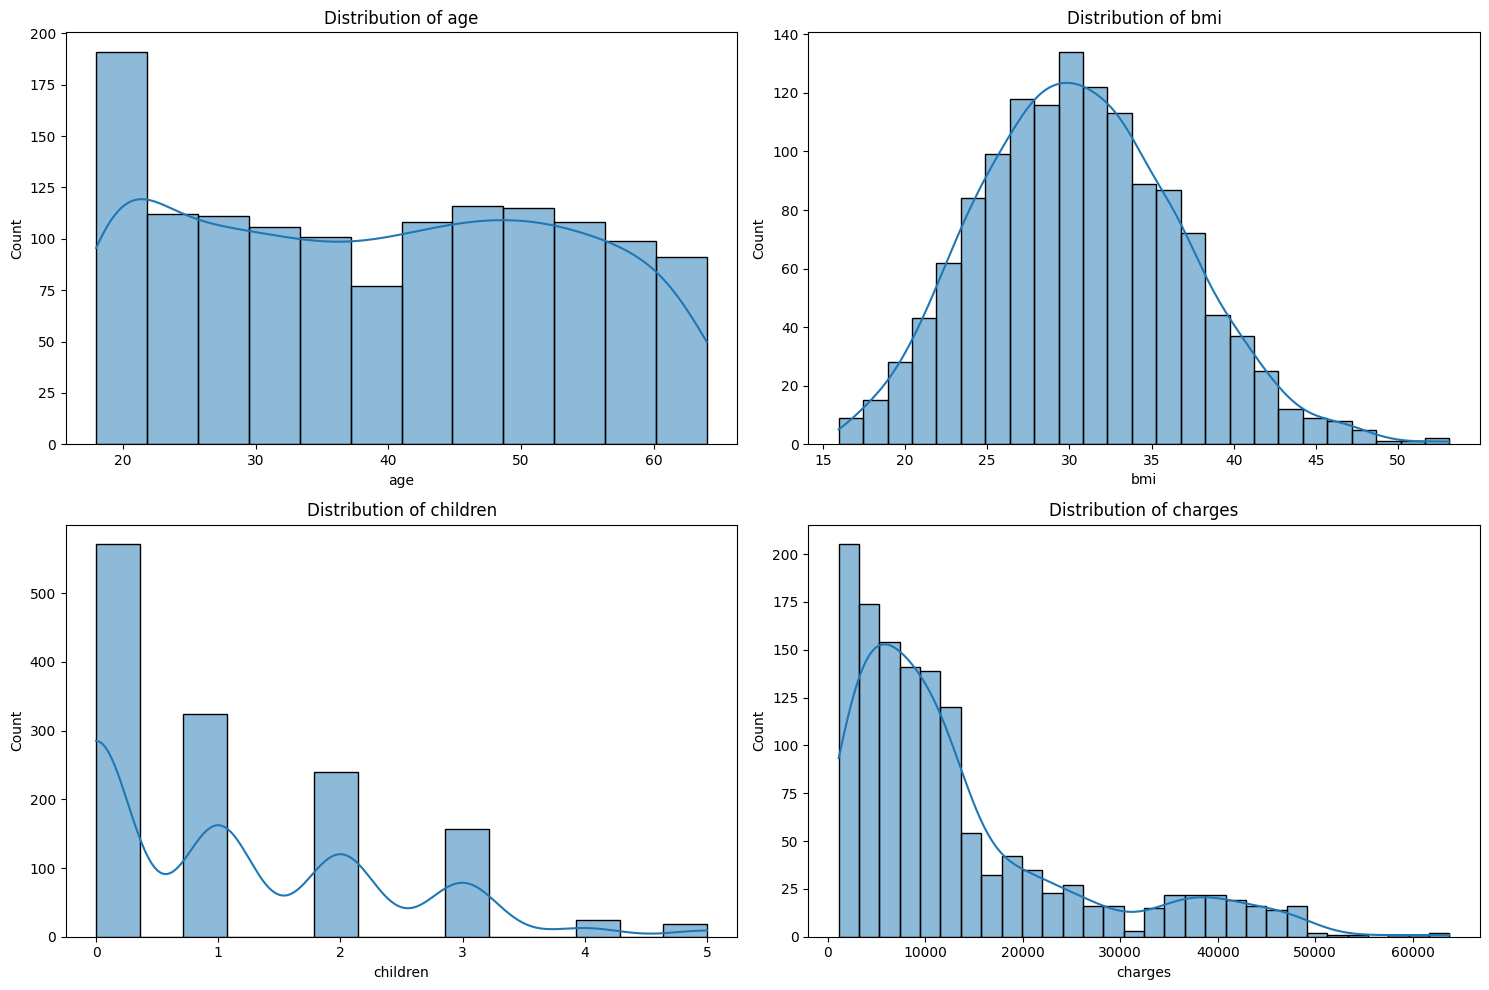

In [53]:
basic_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

# Visualizing distributions of numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()

# Checking correlation between features
correlation_matrix = df.corr()

basic_stats, missing_values, correlation_matrix

### Defining Features and Targets
We create 2 numpy arrays $X$ and $y$ from the dataframe:
+ $X$: Input data of the shape (number of samples, number of input features)
+ $y$: Target variable of the shape (number of samples,)

In [54]:
X = df.drop(columns=['charges']).values
y = df['charges'].values


print("Shape of X: ", X.shape, ", Shape of y: ", y.shape)

Shape of X:  (1335, 6) , Shape of y:  (1335,)


### Splitting the Dataset
We need to pre process the data. We use min-max scaler to scale the input data $X$.
After that, we split the data (**X** and **y**) into a training dataset (**X_train** and **y_train**) and test dataset (**X_test** and **y_test**).

In [55]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)

    return X_scaled


X = min_max_scaler(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train: ",X_train.shape, ", Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape, ", Shape of y_test: ",y_test.shape)

Shape of X_train:  (1001, 6) , Shape of y_train:  (1001,)
Shape of X_test:  (334, 6) , Shape of y_test:  (334,)


### Computing the loss function
In linear regression, the model parameters are:

+ $w$: Parameters of the linear regression model (excluding the bias) of the shape (1, number of features)

+ $b$: Bias parameter (scalar) of the linear regression model

Both $w$ and $b$ are numpy arrays.

Given the model parameters $w$ and $b$, the prediction for an input sample $X^i$ is:
$$h_{w,b}(X^i) = w \cdot X^i + b$$
where $X^i$ is the $i^{th}$ training sample with shape (number of features,1)

We implement and compute Mean Squarred Error loss fucntion:
$$ L_{w,b}(X) = (1/(2m))\sum_{i=1}^{m}(y^i - h_{w,b}(X^i))^2 $$
where $y^i$ is the true target value for the $i^{th}$ sample and $h_{w,b}(X^i)$ is the predicted value for the $i^{th}$ sample using the parameters $w$ and $b$.

$w$ is the list of parameters excluding the bias and $b$ is the bias term.

In [56]:
def loss_function(X, y, w, b):
    m = X.shape[0]
    y_pred = np.dot(X, w) + b
    loss = np.sum((y_pred - y)**2) / (2*m)
    
    return loss

### Computing the Gradient of the Loss

In this following function ```compute_gradient```, we compute the gradients $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$ of the loss $L$ w.r.t. $w$ and $b$. More specifically, we iterate over every training example and compute the gradients of the loss for that training example. Finally, we aggregate the gradient values for all the training examples and take the average. The gradients can be computed as:
$$\frac{\partial L}{\partial w} = \frac{1}{m} \sum_{i=1}^m (h_{w,b}(X^i)-y^i)X^i$$

$$\frac{\partial L}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(X^i)-y^i)$$


In [57]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]

    y_pred = np.dot(X, w) + b
    
    dL_dw = np.dot(X.T, (y_pred - y)) / m
    dL_db = np.sum(y_pred - y) / m
    
    return dL_dw, dL_db

### Training the Model using Batch Gradient Descent
We finally implement the batch gradient descent algorithm to train and learn the parameters of the linear regression model. We use the **loss_function** and **compute_gradient** functions implemented above.

In this batch_gradient_descent function, we compute the gradient for the training samples and update the parameters $w$ and $b$ in every iteration:

+ $w \leftarrow w - \alpha \frac{\partial L}{\partial w}$

+ $b \leftarrow b - \alpha \frac{\partial L}{\partial b}$

Additionally, we compute the loss function values in every iteration and store it in the list variable **loss_hist** and print the loss value after every 100 iterations during the training process.

In [58]:
def batch_gradient_descent(X, y, w_initial, b_initial, alpha, num_iters):
    m = X.shape[0]

    loss_hist = []

    w = copy.deepcopy(w_initial)
    b = b_initial

    for i in range(num_iters):
        dL_dw, dL_db = compute_gradient(X, y, w, b)

        w -= alpha * dL_dw
        b -= alpha * dL_db

        loss = loss_function(X, y, w, b)
        loss_hist.append(loss)

        if (i % 100 == 0):
            print(f"Iteration: {i} Loss: {loss}")

    return w, b, loss_hist

### Initialising the parameters
Now we intialize the model parameters ($w$ and $b$) and learning rate (**alpha**). The learning rate alpha is randomly initialized between 0.0001 and 0.001. For the learning rate, we set a seed and make use of the random function.

In [59]:
random_seed = 32
np.random.seed(random_seed)

def initialize_parameters():
    initial_w = None
    initial_b = None
    alpha = None

    initial_w = np.random.random(size=(X_train.shape[1],))
    initial_b = np.random.random()
    alpha = random.uniform(0.0001, 0.001)

    return initial_w,initial_b,alpha

### Training the model
The model is trained using batch gradient descent algorithm for **num_iters=10000** iterations. You can change the number of iterations to check any improvements in the performance.

In [60]:
initial_w, initial_b, alpha = initialize_parameters()

num_iters = 100000

w,b,loss_hist = batch_gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, num_iters)
print("Updated w: ",w)
print("Updated b: ",b)

Iteration: 0 Loss: 158278630.5618906
Iteration: 100 Loss: 150777852.31829596
Iteration: 200 Loss: 143836334.71075878
Iteration: 300 Loss: 137411089.69542536
Iteration: 400 Loss: 131462441.53746171
Iteration: 500 Loss: 125953771.54220042
Iteration: 600 Loss: 120851282.45933203
Iteration: 700 Loss: 116123781.04397814
Iteration: 800 Loss: 111742477.37533091
Iteration: 900 Loss: 107680799.64138646
Iteration: 1000 Loss: 103914223.19783022
Iteration: 1100 Loss: 100420112.80099405
Iteration: 1200 Loss: 97177576.9995846
Iteration: 1300 Loss: 94167333.74813093
Iteration: 1400 Loss: 91371586.37731522
Iteration: 1500 Loss: 88773909.12300202
Iteration: 1600 Loss: 86359141.47729628
Iteration: 1700 Loss: 84113290.68173319
Iteration: 1800 Loss: 82023441.73510264
Iteration: 1900 Loss: 80077674.33676925
Iteration: 2000 Loss: 78264986.23098408
Iteration: 2100 Loss: 76575222.45887522
Iteration: 2200 Loss: 74999010.06282528
Iteration: 2300 Loss: 73527697.82302976
Iteration: 2400 Loss: 72153300.63841741
It

### Evaluating the Model
We assess the model's accuracy using metrics like Mean Squared Error (MSE) and R-squared (R²).

In [61]:
train_error = loss_function(X_train, y_train, w, b)
test_error = loss_function(X_test, y_test, w, b)
print("Train Error: ",train_error, ", Test Error: ",test_error)

def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def predict(X, w, b):
    return np.dot(X, w) + b

y_train_pred = predict(X_train, w, b)
y_test_pred = predict(X_test, w, b)

train_mse = calculate_mse(y_train, y_train_pred)
test_mse = calculate_mse(y_test, y_test_pred)

train_r2 = calculate_r2(y_train, y_train_pred)
test_r2 = calculate_r2(y_test, y_test_pred)

print("Train MSE: ", train_mse, ", Test MSE: ", test_mse)
print("Train R²: ", train_r2, ", Test R²: ", test_r2)

Train Error:  18879714.75957683 , Test Error:  20150119.102867577
Train MSE:  37759429.51915366 , Test MSE:  40300238.205735154
Train R²:  0.7412527882009416 , Test R²:  0.7274434281396124


### Analysing Model Coefficients
We examine the model coefficients to understand the impact of each feature on the predicted
charges

In [62]:
def display_coefficients(features, coefficients, intercept):
    coef_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': coefficients
    })
    coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
    coef_df = coef_df.reset_index(drop=True)
    
    print("\nModel Coefficients:")
    print(coef_df)
    print("\nIntercept (Bias):", intercept)

feature_names = df.drop(columns=['charges']).columns.tolist()

display_coefficients(feature_names, w, b)



Model Coefficients:
    Feature   Coefficient
0    smoker  22791.585990
1       age   9880.860166
2       bmi   5377.287455
3  children   1814.752016
4       sex     36.675925
5    region    -59.840855

Intercept (Bias): 1636.9615409601092
